# EMG Signal for gesture recognition

https://www.kaggle.com/sojanprajapati/emg-signal-for-gesture-recognition/discussion

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('EMG-data.csv')
df.head()

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0,1
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
3,7,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1
4,8,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0,1


In [3]:
print(df.shape)

(4237907, 11)


In [4]:
print("class :", df["class"].unique())
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]
Value Count :
 0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64


In [5]:
channels = df.drop(columns=["label","class","time"])
channels.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [6]:
Classes = df["class"]
print (Classes.unique())
print (Classes)

[0 1 2 3 4 5 6 7]
0          0
1          0
2          0
3          0
4          0
          ..
4237902    0
4237903    0
4237904    0
4237905    0
4237906    0
Name: class, Length: 4237907, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
# 80 and 20
x_train, x_test, y_train, y_test = train_test_split(channels, Classes, test_size=0.2, random_state=1)

In [9]:
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

print (y_train)

(3390325, 8)
(3390325,)
(847582, 8)
(847582,)
2775019    5
2557898    3
3177431    0
3857877    2
747572     0
          ..
413825     0
2326672    0
1166159    3
491263     0
3937352    0
Name: class, Length: 3390325, dtype: int64


In [10]:
# Normalizing data
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train -= mean
x_train /= std

x_test -= mean
x_test /= std

In [11]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
print (y_train.shape)
print (y_test.shape)

print (y_train)

(3390325, 8)
(847582, 8)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [5]:
def create_model ():

    from tensorflow.keras import optimizers

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(1024, input_shape=(8,)),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'), 
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(8, activation='softmax'),
    ])
    
    model.compile(optimizer = optimizers.Nadam(lr=1e-3), 
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])
    return model 

In [6]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4

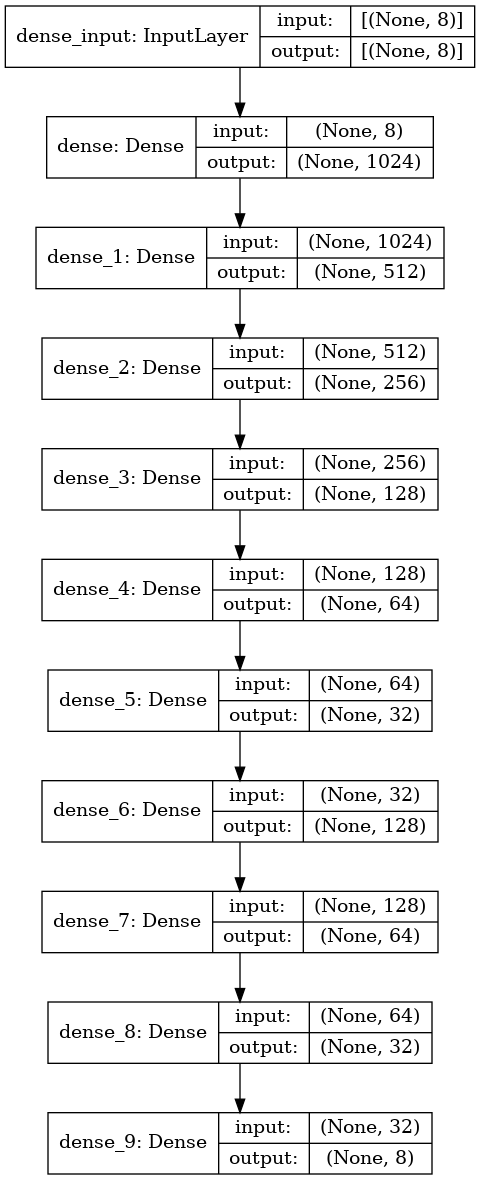

In [7]:
dot_img_file = '/tmp/model_1.png'

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [24]:
import os

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(x_train, y_train,
                    batch_size=512, 
                    epochs = 200,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback])

Epoch 1/200
6622/6622 [==============================] - 213s 32ms/step - loss: 0.9532 - accuracy: 0.6420 - val_loss: 0.8901 - val_accuracy: 0.6476

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/200
6622/6622 [==============================] - 203s 31ms/step - loss: 0.8815 - accuracy: 0.6481 - val_loss: 0.8654 - val_accuracy: 0.6509

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/200
6622/6622 [==============================] - 210s 32ms/step - loss: 0.8596 - accuracy: 0.6530 - val_loss: 0.8459 - val_accuracy: 0.6579

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/200
6622/6622 [==============================] - 209s 32ms/step - loss: 0.8371 - accuracy: 0.6606 - val_loss: 0.8263 - val_accuracy: 0.6654

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/200
6622/6622 [==============================] - 210s 32ms/step - loss: 0.8148 - accuracy: 0.6699 - val_loss: 0.8097 - val_accuracy: 0.6728

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/200
662

6622/6622 [==============================] - 205s 31ms/step - loss: 0.5074 - accuracy: 0.8222 - val_loss: 0.5467 - val_accuracy: 0.8109

Epoch 00083: saving model to training_1/cp.ckpt
Epoch 84/200
6622/6622 [==============================] - 211s 32ms/step - loss: 0.5074 - accuracy: 0.8225 - val_loss: 0.5385 - val_accuracy: 0.8145

Epoch 00084: saving model to training_1/cp.ckpt
Epoch 85/200
6622/6622 [==============================] - 211s 32ms/step - loss: 0.5133 - accuracy: 0.8208 - val_loss: 0.5483 - val_accuracy: 0.8116

Epoch 00085: saving model to training_1/cp.ckpt
Epoch 86/200
6622/6622 [==============================] - 211s 32ms/step - loss: 0.5050 - accuracy: 0.8237 - val_loss: 0.5644 - val_accuracy: 0.8038

Epoch 00086: saving model to training_1/cp.ckpt
Epoch 87/200
6622/6622 [==============================] - 211s 32ms/step - loss: 0.5083 - accuracy: 0.8226 - val_loss: 0.5366 - val_accuracy: 0.8155

Epoch 00087: saving model to training_1/cp.ckpt
Epoch 88/200
6622/6622 

6622/6622 [==============================] - 204s 31ms/step - loss: 0.4611 - accuracy: 0.8434 - val_loss: 0.5514 - val_accuracy: 0.8155

Epoch 00165: saving model to training_1/cp.ckpt
Epoch 166/200
6622/6622 [==============================] - 205s 31ms/step - loss: 0.4656 - accuracy: 0.8423 - val_loss: 0.4909 - val_accuracy: 0.8382

Epoch 00166: saving model to training_1/cp.ckpt
Epoch 167/200
6622/6622 [==============================] - 204s 31ms/step - loss: 0.4638 - accuracy: 0.8426 - val_loss: 0.4952 - val_accuracy: 0.8360

Epoch 00167: saving model to training_1/cp.ckpt
Epoch 168/200
6622/6622 [==============================] - 205s 31ms/step - loss: 0.4647 - accuracy: 0.8427 - val_loss: 0.4984 - val_accuracy: 0.8362

Epoch 00168: saving model to training_1/cp.ckpt
Epoch 169/200
6622/6622 [==============================] - 205s 31ms/step - loss: 0.4572 - accuracy: 0.8455 - val_loss: 0.4941 - val_accuracy: 0.8368

Epoch 00169: saving model to training_1/cp.ckpt
Epoch 170/200
6622/

Text(0.5, 1.0, 'Training and validation loss')

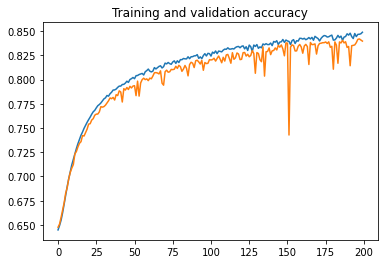

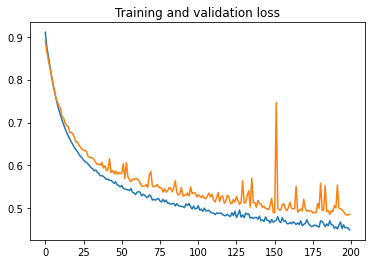

In [27]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [26]:
loss, acc = model.evaluate(x_test, y_test, batch_size = 512)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

1656/1656 [==============================] - 14s 8ms/step - loss: 0.4861 - accuracy: 0.8397
Test loss : 0.4861142933368683
Test accuracy : 83.96627306938171 %


In [34]:
trained_model = create_model()

# Loads the weights
trained_model.load_weights(checkpoint_path)

In [35]:
# Re-evaluate the model
loss, acc = trained_model.evaluate(x_test, y_test, batch_size = 512)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

1656/1656 [==============================] - 14s 8ms/step - loss: 0.4859 - accuracy: 0.8394
Test loss : 0.4861142933368683
Test accuracy : 83.96627306938171 %


In [36]:
import time
start_time = time.time()

print("Predicted Class: ", np.argmax(trained_model.predict(x_test)[50]))
print("Actual Class: ", np.argmax(y_test[50]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  0
Actual Class:  0
--- 40.88572120666504 seconds ---


In [55]:
from tensorflow.keras import layers, Sequential, optimizers, Input, Model

emg_model = create_model()

# Loads the weights
emg_model.load_weights('training_1/cp.ckpt')

for layer in emg_model.layers:
    layer.trainable = False
    
emg_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 1024)              9216      
_________________________________________________________________
dense_170 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_171 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_172 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_173 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_174 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_175 (Dense)            (None, 128)             

In [60]:
from tensorflow.keras.optimizers import RMSprop

last_layer = emg_model.get_layer('dense_177')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = (last_output)

x = layers.Dense(24, activation='relu')(x)
            
# Add a final sigmoid layer for classification
x = layers.Dense  (8, activation='sigmoid')(x)           

model = Model( emg_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
     
     
model.summary()

last layer output shape:  (None, 32)
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169_input (InputLayer) [(None, 8)]               0         
_________________________________________________________________
dense_169 (Dense)            (None, 1024)              9216      
_________________________________________________________________
dense_170 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_171 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_172 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_173 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_174 (Dense)    

In [61]:
import os

checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(x_train, y_train,
                    batch_size=512, 
                    epochs = 200,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback])

Epoch 1/20
6622/6622 [==============================] - 71s 11ms/step - loss: 3.9224 - accuracy: 0.6548 - val_loss: 0.1312 - val_accuracy: 0.8369

Epoch 00001: saving model to training_2/cp.ckpt
Epoch 2/20
6622/6622 [==============================] - 70s 11ms/step - loss: 0.1150 - accuracy: 0.8491 - val_loss: 0.1182 - val_accuracy: 0.8400

Epoch 00002: saving model to training_2/cp.ckpt
Epoch 3/20
6622/6622 [==============================] - 70s 11ms/step - loss: 0.1077 - accuracy: 0.8511 - val_loss: 0.1147 - val_accuracy: 0.8410

Epoch 00003: saving model to training_2/cp.ckpt
Epoch 4/20
6622/6622 [==============================] - 71s 11ms/step - loss: 0.1045 - accuracy: 0.8518 - val_loss: 0.1130 - val_accuracy: 0.8417

Epoch 00004: saving model to training_2/cp.ckpt
Epoch 5/20
6622/6622 [==============================] - 71s 11ms/step - loss: 0.1027 - accuracy: 0.8522 - val_loss: 0.1119 - val_accuracy: 0.8417

Epoch 00005: saving model to training_2/cp.ckpt
Epoch 6/20
6622/6622 [===

In [67]:
trained_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1024, input_shape=(8,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
])
    
trained_model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

# Loads the weights
trained_model.load_weights('training_2/cp.ckpt')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f2223731220> and <tensorflow.python.keras.layers.core.Dense object at 0x7f2223731160>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f2223731160> and <tensorflow.python.keras.layers.core.Dense object at 0x7f2223731ee0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f2223731ee0> and <tensorflow.python.keras.layers.core.Dense object at 0x7f22237310d0>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f22237310d0> and <tensorflow.python.keras.layers.core.Dense object at 0x7f221c08dc40>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.core.Dense object at 0x7f221c08dc40> and <tensorflow.python.keras.layers.core.Dense object at 0x7f2223

In [68]:
# Re-evaluate the model
loss, acc = trained_model.evaluate(x_test, y_test, batch_size = 512)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

1656/1656 [==============================] - 14s 9ms/step - loss: 0.1084 - accuracy: 0.8424
Test loss : 0.10858627408742905
Test accuracy : 84.26087498664856 %


In [69]:
import time
start_time = time.time()

print("Predicted Class: ", np.argmax(trained_model.predict(x_test)[50]))
print("Actual Class: ", np.argmax(y_test[50]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  0
Actual Class:  0
--- 40.331692934036255 seconds ---


# Electromyography(EMG) Dataset

https://www.kaggle.com/nccvector/electromyography-emg-dataset

## Multi-Label Classification 

 Prediction: [0.999, 0.984, 0.002, 0.084, 0.918]
 
    1. Sigmoid activation
        predicting a probability 'value between 0 and 1' for each class    
        
    2. Binary cross-entropy loss function  
        the loss computed for every output vector component is not affected by other component values. 
        it is independent for each vector component (class)